In [1]:
from astropy import units as u

In [2]:
results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/'

# J = 5 - 4
freq_spw_05_04 = '93_spw27'
fmin_05_04 = 91.958*u.GHz
fmax_05_04 = 91.988*u.GHz

# J = 7 - 6
freq_spw_07_06 = '129_spw67'
fmin_07_06 = 128.690*u.GHz
fmax_07_06 = 128.780*u.GHz

# J = 8 - 7
freq_spw_08_07 = '146_spw51'
fmin_08_07 = 147.035*u.GHz
fmax_08_07 = 147.175*u.GHz

# J = 14 - 13
freq_spw_14_13 = '257_spw45'
fmin_14_13 = 255.309*u.GHz
fmax_14_13 = 257.182*u.GHz

In [3]:
from spectral_cube import SpectralCube
cube_05_04 = SpectralCube.read(results+'source_ab_'+freq_spw_05_04+'_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image').to(u.K)
cube_07_06 = SpectralCube.read(results+'source_ab_'+freq_spw_07_06+'_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image').to(u.K)
cube_08_07 = SpectralCube.read(results+'source_ab_'+freq_spw_08_07+'_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image').to(u.K)
cube_14_13 = SpectralCube.read(results+'source_ab_'+freq_spw_14_13+'_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image').to(u.K)
cube_05_04, cube_07_06, cube_08_07, cube_14_13

/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encounte

(DaskVaryingResolutionSpectralCube with shape=(1920, 512, 512) and unit=K and chunk size (80, 256, 512):
  n_x:    512  type_x: RA---SIN  unit_x: deg    range:   266.528130 deg:  266.560501 deg
  n_y:    512  type_y: DEC--SIN  unit_y: deg    range:   -28.719152 deg:  -28.690763 deg
  n_s:   1920  type_s: FREQ      unit_s: Hz     range: 91425792724.639 Hz:93299566513.404 Hz,
 DaskVaryingResolutionSpectralCube with shape=(3840, 512, 512) and unit=K and chunk size (128, 256, 512):
  n_x:    512  type_x: RA---SIN  unit_x: deg    range:   266.528130 deg:  266.560501 deg
  n_y:    512  type_y: DEC--SIN  unit_y: deg    range:   -28.719152 deg:  -28.690763 deg
  n_s:   3840  type_s: FREQ      unit_s: Hz     range: 126732915972.667 Hz:128607482003.168 Hz,
 DaskVaryingResolutionSpectralCube with shape=(3840, 512, 512) and unit=K and chunk size (128, 256, 512):
  n_x:    512  type_x: RA---SIN  unit_x: deg    range:   266.528130 deg:  266.560501 deg
  n_y:    512  type_y: DEC--SIN  unit_y: deg    

In [4]:
# Convert from frequency to velocity
cube_05_04_vel = cube_05_04.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value = 91.9870876*u.GHz) # k = 0
cube_07_06_vel = cube_07_06.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value = 128.7793639*u.GHz) # k = 0
cube_08_07_vel = cube_08_07.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value = 147.1745883*u.GHz) # k = 0
cube_14_13_vel = cube_14_13.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value = 257.1270354*u.GHz) # k = 9

In [5]:
# Get velocity cutout of component
cube_05_04_vel_sub = cube_05_04_vel.spectral_slab(-10*u.km/u.s, 30*u.km/u.s)
cube_07_06_vel_sub = cube_07_06_vel.spectral_slab(-10*u.km/u.s, 30*u.km/u.s)
cube_08_07_vel_sub = cube_08_07_vel.spectral_slab(-10*u.km/u.s, 30*u.km/u.s)
cube_14_13_vel_sub = cube_14_13_vel.spectral_slab(-10*u.km/u.s, 30*u.km/u.s)

In [6]:
# Smooth each cube to a common beam for that cube (go from VaryingResolution to regular)
cube_05_04_common_beam = cube_05_04_vel_sub.beams.common_beam()
cube_07_06_common_beam = cube_07_06_vel_sub.beams.common_beam()
cube_08_07_common_beam = cube_08_07_vel_sub.beams.common_beam()
cube_14_13_common_beam = cube_14_13_vel_sub.beams.common_beam()

cube_05_04_b = cube_05_04_vel_sub.convolve_to(cube_05_04_common_beam)
cube_07_06_b = cube_07_06_vel_sub.convolve_to(cube_07_06_common_beam)
cube_08_07_b = cube_08_07_vel_sub.convolve_to(cube_08_07_common_beam)
cube_14_13_b = cube_14_13_vel_sub.convolve_to(cube_14_13_common_beam)

In [7]:
print(cube_05_04_common_beam)
print(cube_07_06_common_beam)
print(cube_08_07_common_beam)
print(cube_14_13_common_beam)

Beam: BMAJ=1.4395686388015747 arcsec BMIN=1.2283142805099487 arcsec BPA=-63.917236328125 deg
Beam: BMAJ=1.6704803705215454 arcsec BMIN=1.3512648344039917 arcsec BPA=-83.5992660522461 deg
Beam: BMAJ=1.510909080505371 arcsec BMIN=1.1864451169967651 arcsec BPA=-81.83074951171875 deg
Beam: BMAJ=1.4002271890640259 arcsec BMIN=1.1277546882629395 arcsec BPA=-77.77508544921875 deg


In [8]:
# Get common beam between all cubes
import radio_beam
common_beam = radio_beam.commonbeam.common_manybeams_mve(radio_beam.Beams(beams=[cube_05_04_b.beam,
                                                                                 cube_07_06_b.beam,
                                                                                 cube_08_07_b.beam,
                                                                                 cube_14_13_b.beam]))
common_beam

Beam: BMAJ=1.6714827422678769 arcsec BMIN=1.3520756608678757 arcsec BPA=96.40073394775392 deg

In [9]:
cube_05_04_b_resample_spat = cube_05_04_b.to(u.K).convolve_to(common_beam).with_spectral_unit(u.km/u.s)
cube_07_06_b_resample_spat = cube_07_06_b.to(u.K).convolve_to(common_beam).with_spectral_unit(u.km/u.s)
cube_08_07_b_resample_spat = cube_08_07_b.to(u.K).convolve_to(common_beam).with_spectral_unit(u.km/u.s)
cube_14_13_b_resample_spat = cube_14_13_b.to(u.K).convolve_to(common_beam).with_spectral_unit(u.km/u.s)

In [10]:
import matplotlib.pyplot as plt

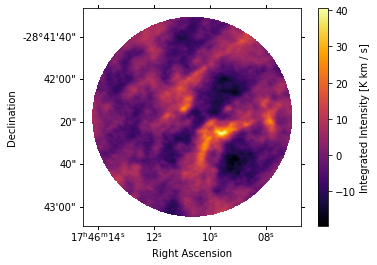

In [11]:
mom0_05_04 = cube_05_04_b_resample_spat.moment0()

ax = plt.subplot(projection=mom0_05_04.wcs)
im = ax.imshow(mom0_05_04.value, origin='lower', cmap='inferno')
cbar = plt.colorbar(im)
cbar.set_label(f'Integrated Intensity [{mom0_05_04.unit}]')
ax.set_ylabel('Declination')
ax.set_xlabel('Right Ascension')

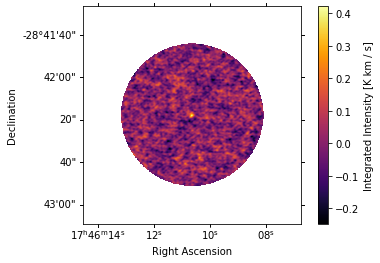

In [12]:
mom0_07_06 = cube_07_06_b_resample_spat.moment0()

ax = plt.subplot(projection=mom0_07_06.wcs)
im = ax.imshow(mom0_07_06.value, origin='lower', cmap='inferno')
cbar = plt.colorbar(im)
cbar.set_label(f'Integrated Intensity [{mom0_07_06.unit}]')
ax.set_ylabel('Declination')
ax.set_xlabel('Right Ascension')

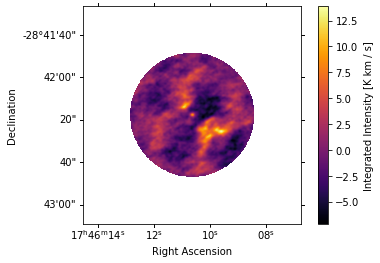

In [13]:
mom0_08_07 = cube_08_07_b_resample_spat.moment0()

ax = plt.subplot(projection=mom0_08_07.wcs)
im = ax.imshow(mom0_08_07.value, origin='lower', cmap='inferno')
cbar = plt.colorbar(im)
cbar.set_label(f'Integrated Intensity [{mom0_08_07.unit}]')
ax.set_ylabel('Declination')
ax.set_xlabel('Right Ascension')

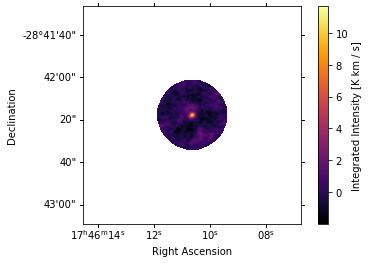

In [14]:
mom0_14_13 = cube_14_13_b_resample_spat.moment0()

ax = plt.subplot(projection=mom0_14_13.wcs)
im = ax.imshow(mom0_14_13.value, origin='lower', cmap='inferno')
cbar = plt.colorbar(im)
cbar.set_label(f'Integrated Intensity [{mom0_14_13.unit}]')
ax.set_ylabel('Declination')
ax.set_xlabel('Right Ascension')

05_04
07_06
08_07
14_13

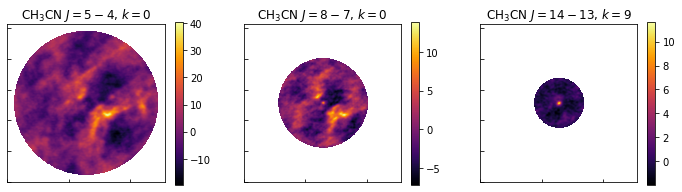

In [35]:
plt.figure(figsize = (12, 3))

ax1 = plt.subplot(131,)# projection = mom0_05_04.wcs, aspect = 1)
ax2 = plt.subplot(132,)# projection = mom0_07_06.wcs, aspect = 1)
ax3 = plt.subplot(133,)# projection = mom0_08_07.wcs, aspect = 1)
# ax4 = plt.subplot(224,)# projection = mom0_14_13.wcs, aspect = 1)

im1 = ax1.imshow(mom0_05_04.value, origin = 'lower', cmap = 'inferno')
# im2 = ax2.imshow(mom0_07_06.value, origin = 'lower', cmap = 'inferno')
im2 = ax2.imshow(mom0_08_07.value, origin = 'lower', cmap = 'inferno')
im3 = ax3.imshow(mom0_14_13.value, origin = 'lower', cmap = 'inferno')

cbar1 = plt.colorbar(mappable = im1, ax = ax1)
cbar2 = plt.colorbar(mappable = im2, ax = ax2)
cbar3 = plt.colorbar(mappable = im3, ax = ax3)
# cbar4 = plt.colorbar(mappable = im4, ax = ax4)

for ax in [ax1, ax2, ax3]:
    ax.tick_params(direction = 'in')
    
ax1.set_title("CH$_3$CN $J = 5 - 4$, $k = 0$")
# ax2.set_title("CH$_3$CN $J = 7 - 6$, $k = 0$")
ax2.set_title("CH$_3$CN $J = 8 - 7$, $k = 0$")
ax3.set_title("CH$_3$CN $J = 14 - 13$, $k = 9$")

ax1.xaxis.set_tick_params(labelbottom = False) # it is not working :')
ax1.yaxis.set_tick_params(labelleft = False)
ax2.xaxis.set_tick_params(labelbottom = False)
ax2.yaxis.set_tick_params(labelleft = False)
ax3.xaxis.set_tick_params(labelbottom = False)
ax3.yaxis.set_tick_params(labelleft = False)
# ax4.xaxis.set_tick_params(labelbottom = False)
# ax4.yaxis.set_tick_params(labelleft = False)

plt.savefig("m0_maps.pdf", dpi = 300, facecolor='w', edgecolor='w', bbox_inches='tight')

In [16]:
# ax4.tick_params?
from astropy.visualization.wcsaxes import CoordinateHelper
CoordinateHelper.set_ticks_visible(ax1.xaxis)

TypeError: set_ticks_visible() missing 1 required positional argument: 'visible'